In [1]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import random as rd

Montana US


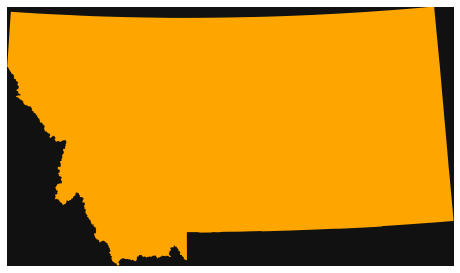

Lewistowm, Montana State roadnetwok represented as Undirected graph
49
83
MultiDiGraph with 49 nodes and 83 edges


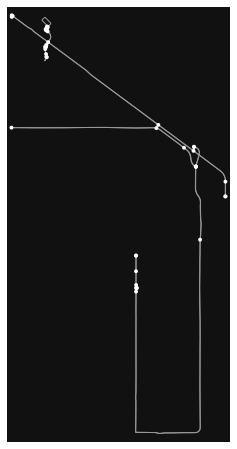

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [2]:
print('Montana US')
state = ox.geocode_to_gdf('Montana, US') 
ox.plot_footprints(ox.project_gdf(state))


print("Lewistowm, Montana State roadnetwok represented as Undirected graph")
north, east, south, west = 45.785, -110.953, 45.558, -111.255 
# Downloading the map as a graph object 
G = ox.graph_from_bbox(north, south, east, west, retain_all=False, custom_filter='["highway"~"secondary"]')
print(len(list(G.nodes(data=True))))
print(len(list(G.edges(data=True)))) 
print(G)
# Plotting the map graph 
ox.plot_graph(G)

In [3]:
def createGraph(depotNodes ,requiredEdges, pos, numNodes, s, t, weights, show=True):
    G = nx.Graph()
    edges = []
#     pos = {}
#     reqPos = {}
#     s = [1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 6, 7]
#     t = [2, 3, 4, 6, 4, 5, 5, 7, 6, 8, 7, 8]
#     weights = [2.3, 2, 3, 1.5, 3.2, 2.2, 3.8, 2.6, 2.2, 2.8, 1.8, 0.8]
#     xData = [-2, -0.5, -1,   0, 1,  1.5, 2,   2.5];
#     yData = [ 0, -2,    2.5, 0, 3, -2,   0.3, 1.5];
    
    for i in range(len(s)):
        edges.append((s[i], t[i], weights[i]))
    
    for i in range(1, numNodes+1):
        G.add_node(i)
#         pos[i] =(xData[i-1], yData[i-1])
    # pos = nx.spring_layout(G)
    print(pos)
    node_color = ['y']*int(G.number_of_nodes())
    depot_node_color = node_color
    for i in range(1, len(node_color)+1):
        if i in depotNodes:
            depot_node_color[i-1] = 'g'
            
    G.add_weighted_edges_from(edges)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx(G,pos, node_color = node_color)
    nx.draw_networkx(G,pos, node_color = depot_node_color)
    nx.draw_networkx_edges(G, pos, edgelist=requiredEdges, width=3, alpha=0.5,
                                        edge_color="r")
    # nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    if show:
        plt.figure(1)
#         plt.show()
    return G,pos, depot_node_color

{1: array([-111.046309,   45.698085]), 2: array([-111.0460967,   45.6980773]), 3: array([-111.0730642,   45.7201505]), 4: array([-111.066621 ,   45.7206188]), 5: array([-111.066884,   45.718751]), 6: array([-111.0626269,   45.6784485]), 7: array([-111.1848846,   45.7802117]), 8: array([-111.089727,   45.730517]), 9: array([-111.0654327,   45.7115391]), 10: array([-111.185046 ,   45.7292643]), 11: array([-111.046179,   45.704777]), 12: array([-111.0909946,   45.7290555]), 13: array([-111.1848855,   45.7794703]), 14: array([-111.065274 ,   45.7115028]), 15: array([-111.0654085,   45.7116884]), 16: array([-111.1623847,   45.7733421]), 17: array([-111.1621936,   45.7735925]), 18: array([-111.1624162,   45.7737008]), 19: array([-111.1623132,   45.7744283]), 20: array([-111.1614883,   45.7749471]), 21: array([-111.1620124,   45.7751293]), 22: array([-111.1624313,   45.7612954]), 23: array([-111.1627588,   45.7657636]), 24: array([-111.1612564,   45.7680336]), 25: array([-111.0652413,   45.71

(<networkx.classes.graph.Graph at 0x1d3127deb20>,
 {1: array([-111.046309,   45.698085]),
  2: array([-111.0460967,   45.6980773]),
  3: array([-111.0730642,   45.7201505]),
  4: array([-111.066621 ,   45.7206188]),
  5: array([-111.066884,   45.718751]),
  6: array([-111.0626269,   45.6784485]),
  7: array([-111.1848846,   45.7802117]),
  8: array([-111.089727,   45.730517]),
  9: array([-111.0654327,   45.7115391]),
  10: array([-111.185046 ,   45.7292643]),
  11: array([-111.046179,   45.704777]),
  12: array([-111.0909946,   45.7290555]),
  13: array([-111.1848855,   45.7794703]),
  14: array([-111.065274 ,   45.7115028]),
  15: array([-111.0654085,   45.7116884]),
  16: array([-111.1623847,   45.7733421]),
  17: array([-111.1621936,   45.7735925]),
  18: array([-111.1624162,   45.7737008]),
  19: array([-111.1623132,   45.7744283]),
  20: array([-111.1614883,   45.7749471]),
  21: array([-111.1620124,   45.7751293]),
  22: array([-111.1624313,   45.7612954]),
  23: array([-111.162

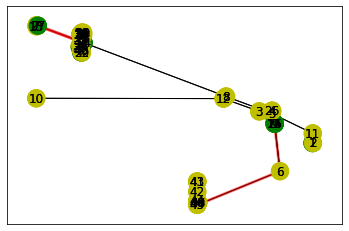

In [9]:
dic = {}
startNode = []
endNode = []
edgeWeight = []
depotNodes = []
requiredEdges = []
pos = {}

for i in range(len(list(G.nodes(data=True)))):
  dic[list(G.nodes(data=True))[i][0]] = i+1
  pos[i+1] = np.array([list(G.nodes(data=True))[i][1]['x'], list(G.nodes(data=True))[i][1]['y']])


for i in range(len(list(G.edges(data=True)))):
  startNode.append(dic[list(G.edges(data=True))[i][0]])
  endNode.append(dic[list(G.edges(data=True))[i][1]])
  edgeWeight.append(list(G.edges(data=True))[i][2]['length'])

newDepotNodes = []
requiredEdgeIndexes = []
newRequiredEdges = []
newNonRequiredEdges = []
depotNodesLat = []
depotNodesLong = []
normalNodesLat = []
normalNodesLong = []
requiredEdges = []
nonrequiredEdges = []

count = 0
while count <= (len(list(G.nodes(data=True)))//5):
    node = rd.randint(1, len(list(G.nodes(data=True))))
    if node not in newDepotNodes:
        newDepotNodes.append(node)
        count += 1
count = 0
while count <= (len(list(G.edges(data=True)))//3):
    edge = rd.randint(0, len(list(G.edges(data=True)))-1)
    if edge not in requiredEdgeIndexes:
        requiredEdgeIndexes.append(edge)
        count += 1

for i in range(len(list(G.edges(data=True)))):
    if i in requiredEdgeIndexes:
        newRequiredEdges.append([startNode[i], endNode[i]])
    else:
        newNonRequiredEdges.append([startNode[i], endNode[i]])

for i in range(len(newDepotNodes)):
    for node in list(G.nodes(data=True)):
        if node[0] == list(dic.keys())[list(dic.values()).index(newDepotNodes[i])]:
            depotNodesLat.append(node[1]['y'])
            depotNodesLong.append(node[1]['x'])

for key, val in dic.items():
    if val not in newDepotNodes:
        for node in list(G.nodes(data=True)):
            if node[0] == key:
                normalNodesLat.append(node[1]['y'])
                normalNodesLong.append(node[1]['x'])

for u, v in newRequiredEdges:
    requiredEdges.append([list(dic.keys())[list(dic.values()).index(u)], list(dic.keys())[list(dic.values()).index(v)]])

    
for u, v in newNonRequiredEdges:
    nonrequiredEdges.append([list(dic.keys())[list(dic.values()).index(u)], list(dic.keys())[list(dic.values()).index(v)]])


createGraph(newDepotNodes , newRequiredEdges, pos, G.number_of_nodes(), startNode, endNode, edgeWeight)

In [45]:
for edge in newRequiredEdges:
    if edge in newNonRequiredEdges:
        print('Eashwar')

In [10]:
print(rd.randint(0,2))

2


# New Section

In [11]:
print(list(G.nodes(data=True))[0])
print(list(G.edges(data=True))[0])

(40711085, {'y': 45.698085, 'x': -111.046309, 'highway': 'traffic_signals', 'street_count': 1})
(40711088, 40948650, {'osmid': 143012024, 'oneway': True, 'name': 'North 7th Avenue', 'highway': 'secondary', 'length': 745.209, 'geometry': <shapely.geometry.linestring.LineString object at 0x000001D30A45E6A0>})


In [12]:
print(list(G.edges(data=True))[0])

(40711088, 40948650, {'osmid': 143012024, 'oneway': True, 'name': 'North 7th Avenue', 'highway': 'secondary', 'length': 745.209, 'geometry': <shapely.geometry.linestring.LineString object at 0x000001D30A45E6A0>})


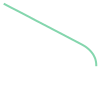

In [13]:
# Displaying the shape of edge using the geometry
list(G.edges(data=True))[5][2]['geometry']

In [14]:
def getLatLongofRoutes(G, routes):
    latLong = []
    for node_list in routes:
        edge_nodes = list(zip(node_list[:-1], node_list[1:]))
        lines = []
        for u, v in edge_nodes:
            # if there are parallel edges, select the shortest in length
            data = min(G.get_edge_data(u, v).values(), 
                       key=lambda x: x['length'])
            # if it has a geometry attribute
            if 'geometry' in data:
                # add them to the list of lines to plot
                xs, ys = data['geometry'].xy
                lines.append(list(zip(xs, ys)))
            else:
                # if it doesn't have a geometry attribute,
                # then the edge is a straight line from node to node
                x1 = G.nodes[u]['x']
                y1 = G.nodes[u]['y']
                x2 = G.nodes[v]['x']
                y2 = G.nodes[v]['y']
                line = [(x1, y1), (x2, y2)]
                lines.append(line)

        long2 = []
        lat2 = []
        for i in range(len(lines)):
            z = list(lines[i])
            l1 = list(list(zip(*z))[0])
            l2 = list(list(zip(*z))[1])
            for j in range(len(l1)):
                long2.append(l1[j])
                lat2.append(l2[j])
    
        latLong.append([lat2, long2])
    return latLong


In [68]:
def latLongofEdges(G, requiredEdges):
    lines = []
    for u, v in requiredEdges:
        # if there are parallel edges, select the shortest in length
        data = min(G.get_edge_data(u, v).values(), 
                   key=lambda x: x['length'])
        # if it has a geometry attribute
        if 'geometry' in data:
            # add them to the list of lines to plot
            xs, ys = data['geometry'].xy
            lines.append(list(zip(xs, ys)))
        else:
            # if it doesn't have a geometry attribute,
            # then the edge is a straight line from node to node
            x1 = G.nodes[u]['x']
            y1 = G.nodes[u]['y']
            x2 = G.nodes[v]['x']
            y2 = G.nodes[v]['y']
            line = [(x1, y1), (x2, y2)]
            lines.append(line)
        
    longi = []
    lati = []
    for i in range(len(lines)):
        long2 = []
        lat2 = []
        z = list(lines[i])
        l1 = list(list(zip(*z))[0])
        l2 = list(list(zip(*z))[1])
        for j in range(len(l1)):
            long2.append(l1[j])
            lat2.append(l2[j])
        longi.append(long2)
        lati.append(lat2)
    
    return longi, lati

        

In [69]:
# getting coordinates of the nodes
# we will store the longitudes and latitudes in following list 
# long = [] 
# lat = []  
# for i in route:
#      point = G.nodes[i]
#      long.append(point['x'])
#      lat.append(point['y'])
# print([lat[0], lat[1]])
# print(long)

In [136]:
def plot_graph(lat, long, latLongNonreqEdges, depotNodesLat, depotNodesLong, normalNodesLat, normalNodesLong, routeLatLong=None): 
    longi = []
    lati = []
    colors = ['red', 'pink']
    fig = go.Figure(go.Scattermapbox(
        name = "depots",
        mode = "markers",
        lon = depotNodesLong,
        lat = depotNodesLat,
        marker = {'size': 10, 'color':"green"}))
    
    fig.add_trace(go.Scattermapbox(
        name = "Normal Nodes",
        mode = "markers",
        lon = normalNodesLong,
        lat = normalNodesLat,
        marker = {'size': 8, 'color':"yellowgreen"}))
    
#     if routeLatLong is not None:
#         for latit, longit in routeLatLong:
#             fig.add_trace(go.Scattermapbox(
#             name = "Paths",
#             mode = "lines",
#             lon = longit,
#             lat = latit,
#             marker = {'size': 10},
#             line = dict(width = 4, color = 'blue')))
    
    for i in range(len(lat)): 
        longi += long[i]
        lati += lat[i]
        fig.add_trace(go.Scattermapbox(
            name = "Desired Edge",
            mode = "lines",
            lon = long[i],
            lat = lat[i],
            marker = {'size': 10},
            line = dict(width = 3, color = 'red')))
    
    nlat, nlong = latLongNonreqEdges[0], latLongNonreqEdges[1]
    
    for i in range(len(nlat)): 
#         longi += nlong[i]
#         lati += nlat[i]
        fig.add_trace(go.Scattermapbox(
            name = "Undesired Edge",
            mode = "lines",
            lon = nlong[i],
            lat = nlat[i],
            marker = {'size': 10},
            line = dict(width = 1, color = 'black')))
    
   
    if routeLatLong is not None:
        for latit, longit in routeLatLong:
            fig.add_trace(go.Scattermapbox(
            name = "Paths",
            mode = "lines",
            lon = longit,
            lat = latit,
            marker = {'size': 10},
            line = dict(width = 4, color = 'blue')))
#     fig = go.Figure(go.Scattermapbox(
#         name = "Desired Edge 1",
#         mode = "lines",
#         lon = long[1],
#         lat = lat[1],
#         marker = {'size': 10},
#         line = dict(width = 4.5, color = 'blue')))
    
#     fig = go.Figure(go.Scattermapbox(
#         name = "Path1",
#         mode = "lines",
#         lon = [long[3], long[4]],
#         lat = [lat[3], lat[4]],
#         marker = {'size': 10},
#         line = dict(width = 4.5, color = 'blue')))

#     fig.add_annotation(
#               x=lat[1],  # arrows' head
#               y=long[1],  # arrows' head
#               ax=lat[0],
#               ay=long[0],
#               xref='x',
#               yref='y',
#               axref='x',
#               ayref='y',
#               text='',  # if you want only the arrow
#               showarrow=True,
#               arrowhead=3,
#               arrowsize=1,
#               arrowwidth=1,
#               arrowcolor='black'
#             )

    
   
     
#     adding destination marker
#     fig.add_trace(go.Scattermapbox(
#         name = "Destination",
#         mode = "markers",
#         lon = [destination_point[1]],
#         lat = [destination_point[0]],
#         marker = {'size': 12, 'color':'green'}))
    
    # getting center for plots:
    lat_center = np.mean(lati)
    long_center = np.mean(longi)
    # defining the layout using mapbox_style
    fig.update_layout(mapbox_style="open-street-map",
        mapbox_center_lat = 30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                      mapbox = {
                          'center': {'lat': lat_center, 
                          'lon': long_center},
                          'zoom': 13})
    fig.show()

In [141]:
# define origin and desination locations  
origin_point = (depotNodesLat[0], depotNodesLong[0]) 
destination_point = (depotNodesLat[2], depotNodesLong[2])

# origin_point1 = (list(G.nodes(data=True))[5][1]['y'], list(G.nodes(data=True))[5][1]['x']) 
# destination_point1 = (list(G.nodes(data=True))[10][1]['y'], list(G.nodes(data=True))[10][1]['x'])

origin_point1 = (depotNodesLat[5], depotNodesLong[5]) 
destination_point1 = (depotNodesLat[7], depotNodesLong[7])


# get the nearest nodes to the locations 
# origin_node = ox.get_nearest_node(G, origin_point) 
# destination_node = ox.get_nearest_node(G, destination_point)
origin_node = ox.distance.nearest_nodes(G, origin_point[1], origin_point[0]) 
destination_node = ox.distance.nearest_nodes(G, destination_point[1], destination_point[0])
# printing the closest node id to origin and destination points 

origin_node1 = ox.distance.nearest_nodes(G, origin_point1[1], origin_point1[0]) 
destination_node1 = ox.distance.nearest_nodes(G, destination_point1[1], destination_point1[0])


In [142]:
# Finding the optimal path 
route1 = nx.shortest_path(G, origin_node, destination_node, weight = 'length')

route2 = nx.shortest_path(G, origin_node1, destination_node1, weight = 'length')

route = [route1, route2]

In [143]:
reqlongi, reqlati = latLongofEdges(G, requiredEdges)
nreqlongi, nreqlati = latLongofEdges(G, nonrequiredEdges)
routeLatLong = getLatLongofRoutes(G, route)

In [144]:
plot_graph(reqlati, reqlongi, [nreqlati, nreqlongi], depotNodesLat, depotNodesLong, normalNodesLat, normalNodesLong, routeLatLong)

In [30]:
# # Getting the start and end node of this part 
# start_node=route[-7] 
# end_node=route[-6]
# # Getting the edge connecting these nodes and storing it as a list in z to maintain the data structure of G.edges 
# z = []  
# for i in list(G.edges(data=True)):
#      if (i[0]==start_node) & (i[1]==end_node):
#          z.append(i)
 
# z[0][2]['geometry']

In [31]:
print("Length of lat: ", len(lat))
print("Length of lat2: ", len(lat2))


NameError: name 'lat' is not defined

In [32]:
plot_path(lat2, long2, origin_point, destination_point)

NameError: name 'plot_path' is not defined

In [13]:
# def plot_path(lat, long, origin_point, destination_point):
    
#     """
#     Given a list of latitudes and longitudes, origin 
#     and destination point, plots a path on a map
    
#     Parameters
#     ----------
#     lat, long: list of latitudes and longitudes
#     origin_point, destination_point: co-ordinates of origin
#     and destination
#     Returns
#     -------
#     Nothing. Only shows the map.
#     """
#     # adding the lines joining the nodes
#     fig = go.Figure(go.Scattermapbox(
#         name = "Path",
#         mode = "lines",
#         lon = long,
#         lat = lat,
#         marker = {'size': 10},
#         line = dict(width = 4.5, color = 'blue')))
#     # adding source marker
#     fig.add_trace(go.Scattermapbox(
#         name = "Source",
#         mode = "markers",
#         lon = [origin_point[1]],
#         lat = [origin_point[0]],
#         marker = {'size': 12, 'color':"red"}))
     
#     # adding destination marker
#     fig.add_trace(go.Scattermapbox(
#         name = "Destination",
#         mode = "markers",
#         lon = [destination_point[1]],
#         lat = [destination_point[0]],
#         marker = {'size': 12, 'color':'green'}))
    
#     # getting center for plots:
#     lat_center = np.mean(lat)
#     long_center = np.mean(long)
#     # defining the layout using mapbox_style
#     fig.update_layout(mapbox_style="stamen-terrain",
#         mapbox_center_lat = 30, mapbox_center_lon=-80)
#     fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
#                       mapbox = {
#                           'center': {'lat': lat_center, 
#                           'lon': long_center},
#                           'zoom': 13})
#     fig.show()